In [1]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] Tesla V100-SXM2-16GB
    • Total memory: 15.8 GB
    • Compute capability: 7.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.2rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



In [2]:
import matplotlib.colors as mcolors

def rgba_list_to_hex(colors, include_alpha=False):
    """
    把一系列 RGBA 元组转换成 HTML 十六进制颜色值。
    
    参数：
      colors: Iterable of (r, g, b, a) tuples, each in [0, 1]
      include_alpha: bool, 是否在输出中包含 alpha 通道
    
    返回：
      List of strings, 如 ['#RRGGBB', …] 或 ['#RRGGBBAA', …]
    """
    hex_list = []
    for rgba in colors:
        # matplotlib 的 to_hex 自动处理 RGB，也能加透明度
        hex_code = mcolors.to_hex(rgba, keep_alpha=include_alpha)
        hex_list.append(hex_code)
    return hex_list

# 示例用法
from colormaps.colormap import Colormap
cmap = Colormap([(1,0,0,1), (0,1,0,0.5), (0,0,1,1)], name='mylist')

# 只要 RGB
html_colors = rgba_list_to_hex(cmap.colors)
print(html_colors)
# 输出: ['#FF0000', '#00FF00', '#0000FF']

# 要包含 alpha 通道
html_colors_with_alpha = rgba_list_to_hex(cmap.colors, include_alpha=True)
print(html_colors_with_alpha)
# 输出: ['#FF0000FF', '#00FF0080', '#0000FFFF']


['#ff0000', '#00ff00', '#0000ff']
['#ff0000ff', '#00ff0080', '#0000ffff']


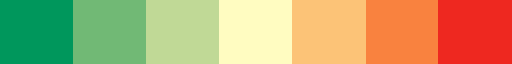

In [3]:
import colormaps as cmaps
cmaps.drought_severity

In [4]:
rgba_list_to_hex(cmaps.cet_g_bw_minc_minl.colors)

['#d60000',
 '#018700',
 '#b500ff',
 '#05acc6',
 '#97ff00',
 '#ffa52f',
 '#ff8ec8',
 '#79525e',
 '#00fdcf',
 '#afa5ff',
 '#93ac83',
 '#9a6900',
 '#366962',
 '#d3008c',
 '#fdf490',
 '#c86e66',
 '#9ee2ff',
 '#00c846',
 '#a877ac',
 '#b8ba01',
 '#f4bfb1',
 '#ff28fd',
 '#f2cdff',
 '#009e7c',
 '#ff6200',
 '#56642a',
 '#953f1f',
 '#90318e',
 '#ff3464',
 '#a0e491',
 '#8c9ab1',
 '#829026',
 '#ae083f',
 '#77c6ba',
 '#bc9157',
 '#e48eff',
 '#72b8ff',
 '#c6a5c1',
 '#ff9070',
 '#d3c37c',
 '#bceddb',
 '#6b8567',
 '#916e56',
 '#f9ff00',
 '#bac1df',
 '#ac567c',
 '#ffcd03',
 '#ff49b1',
 '#c15603',
 '#5d8c90',
 '#c144bc',
 '#00753f',
 '#ba6efd',
 '#00d493',
 '#00ff75',
 '#49a150',
 '#cc9790',
 '#00ebed',
 '#db7e01',
 '#f77589',
 '#b89500',
 '#c84248',
 '#00cff9',
 '#755726',
 '#85d401',
 '#ebffd4',
 '#a77b87',
 '#db72c8',
 '#cae256',
 '#8abf5d',
 '#a1216b',
 '#855b89',
 '#89bacf',
 '#ffbad6',
 '#b6cfaa',
 '#97414d',
 '#67aa00',
 '#fde1b1',
 '#ff3628',
 '#80793d',
 '#d6e8ff',
 '#a795c6',
 '#7ea59a',
 '#d

In [5]:
!wget https://datasets.cellxgene.cziscience.com/c92b198e-98b8-40ae-aea5-b820c6d93ee4.h5ad -O data/trophoblast.h5ad

--2025-06-08 23:29:49--  https://datasets.cellxgene.cziscience.com/c92b198e-98b8-40ae-aea5-b820c6d93ee4.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 3.168.86.94, 3.168.86.114, 3.168.86.96, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|3.168.86.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3622629679 (3.4G) [binary/octet-stream]
Saving to: ‘data/trophoblast.h5ad’

100%[====================================>] 3,622,629,679 59.7MB/s   in 58s    

2025-06-08 23:30:47 (60.0 MB/s) - ‘data/trophoblast.h5ad’ saved [3622629679/3622629679]



In [4]:
adata = sc.read(
    'data/trophoblast.h5ad',
)
adata

AnnData object with n_obs × n_vars = 325665 × 30456
    obs: 'batch', 'celltype_predictions', 'coarse_annot', 'dataset', 'dev_age', 'number_of_individuals_multiplexed', 'origin_M_F', 'phase', 'sample', 'technology', 'n_counts', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'default_embedding', 'dev_age_colors', 'neighbors_scVI_n_latent_14_sample_n_layers_3', 'neighbors_scVI_n_latent_20_sample_n_layers_3', 'schema_reference', 'schema_version',

In [15]:
adata.obs['celltype_predictions']=[i.split('_')[1] for i in adata.obs['celltype_predictions']]

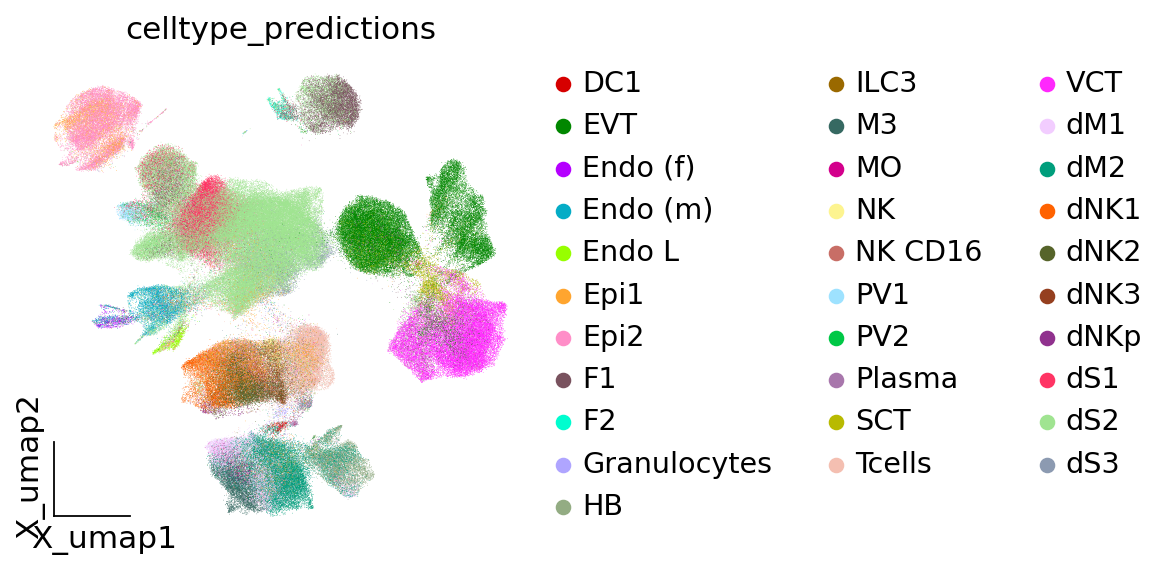

In [16]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['celltype_predictions'],
    palette=rgba_list_to_hex(cmaps.cet_g_bw_minc_minl.colors),
    wspace=0.55,
    ncols=1
)

In [12]:
# 
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    local_model_dir="./my_models"
)

🔨 Creating ontology resources from OBO file...
📖 Parsing ontology file...
🧠 Creating NLP embeddings...
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🔄 Encoding 16841 ontology labels...


Batches:   0%|          | 0/527 [00:00<?, ?it/s]

💾 Embeddings saved to: new_ontology/ontology_embeddings.pkl
📋 Ontology mappings included: 16841 cell types
✓ Ontology resources creation completed!


In [17]:
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    embeddings_path='new_ontology/ontology_embeddings.pkl',
    local_model_dir="./my_models"
)

📥 Loading existing ontology embeddings...
📥 Loaded embeddings for 16841 ontology labels
📋 Ontology mappings loaded: 16841 cell types


In [19]:

mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="trophoblast",    # 组织上下文
    species="Homo sapiens",                   # 物种信息
    study_context="trophoblast development in early pregnancy",
    api_key="sk-*"
)
mapper.load_cell_taxonomy_resource("new_ontology/Cell_Taxonomy_resource.txt", 
                                   species_filter=["Homo sapiens", "Mus musculus"])


✓ Loaded 106 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: trophoblast
🔬 Study context: trophoblast development in early pregnancy
🐭 Species: Homo sapiens
📊 Loading Cell Taxonomy resource from: new_ontology/Cell_Taxonomy_resource.txt
✓ Loaded 226222 taxonomy entries
🐭 Filtered by species ['Homo sapiens', 'Mus musculus']: 224736/226222 entries
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🧠 Creating embeddings for 2540 taxonomy cell types...


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

✓ Created taxonomy embeddings for 2540 cell types
📈 Species distribution:
  🐭 Mus musculus: 141727 entries
  🐭 Homo sapiens: 83009 entries
🧬 Unique cell types: 2540
🎯 Unique markers: 25818


True

In [20]:
enhanced_results = mapper.map_adata_with_taxonomy(
    adata, 
    cell_name_col="celltype_predictions",
    new_col_name="enhanced_cell_ontology",
    expand_abbreviations=True,
    use_taxonomy=True,
    species="Homo sapiens",
    tissue_context="trophoblast",
    threshold=0.3,
)

📊 Using 31 unique cell names from column 'celltype_predictions'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: trophoblast
🔬 Using study context: trophoblast development in early pregnancy
🐭 Species: Homo sapiens
  🔤 Identified potential abbreviation: dNK1
  🔤 Identified potential abbreviation: Tcells
  🔤 Identified potential abbreviation: dNK2
  🔤 Identified potential abbreviation: dNK3
  🔤 Identified potential abbreviation: dM1
  🔤 Identified potential abbreviation: dM2
  🔤 Identified potential abbreviation: dNKp
  🔤 Identified potential abbreviation: dS3
  🔤 Identified potential abbreviation: EVT
  🔤 Identified potential abbreviation: M3
  🔤 Identified potential abbreviation: NK
  🔤 Identified potential abbreviation: dS1
  🔤 Identified potential abbreviation: Plasma
  🔤 Identified potential abbreviation: PV2
  🔤 Identified potential abbreviation: dS2
  🔤 Identified potential abbreviation: SCT
  🔤 Identified potential abbreviation: PV1
  🔤 Identif

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  🤖 [1/31] LLM selecting for: Granulocytes
    ✓ LLM selected: granulosa cell (rank 10, sim: 0.671)
    💡 Reasoning: Granulosa cells are more relevant to the context of early pregnancy and trophoblast development due ...
  🤖 [2/31] LLM selecting for: Endo L
    ✓ LLM selected: endometrium luminal epithelium (rank 10, sim: 0.308)
    💡 Reasoning: The endometrium luminal epithelium is closely associated with trophoblast development during early p...
  🤖 [3/31] LLM selecting for: Endo (m)
    ✓ LLM selected: endo-epithelial cell (rank 1, sim: 0.545)
    💡 Reasoning: The term 'endo-epithelial cell' aligns most closely with the trophoblast context in early pregnancy,...
  🤖 [4/31] LLM selecting for: Endo (f)
    ✓ LLM selected: endometrial blood vessel (rank 6, sim: 0.373)
    💡 Reasoning: The trophoblast interacts closely with the maternal endometrium during early pregnancy, particularly...
  🤖 [5/31] LLM selecting for: decidual natural killer cell type 1
    ✓ LLM selected: decidual natur

In [21]:
adata.obs.to_csv('data/Trophoblast_anno.csv')

In [5]:
adata.obs=ov.read('data/Trophoblast_anno.csv',index_col=0)

In [22]:
type_dict=dict(zip(
    adata.obs['celltype_predictions'],
    adata.obs['enhanced_cell_ontology_taxonomy_match'],
))

In [23]:
color_dict=dict(zip(
    adata.obs['celltype_predictions'].cat.categories,
    adata.uns['celltype_predictions_colors'],
))

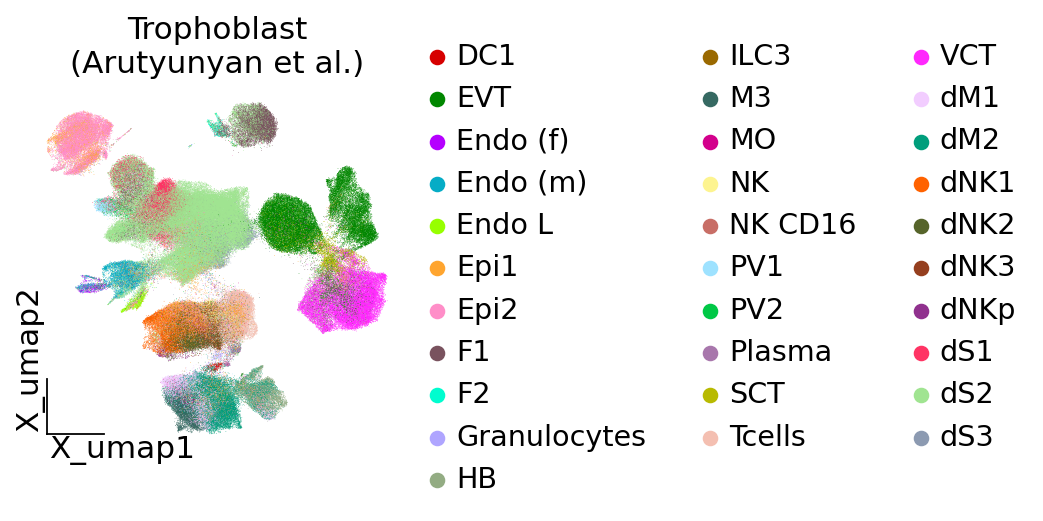

In [24]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='celltype_predictions',
    title='Trophoblast\n(Arutyunyan et al.)',
    show=False,
    palette=color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-Trophoblast-author-33.png',dpi=300,bbox_inches='tight')

In [25]:
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict

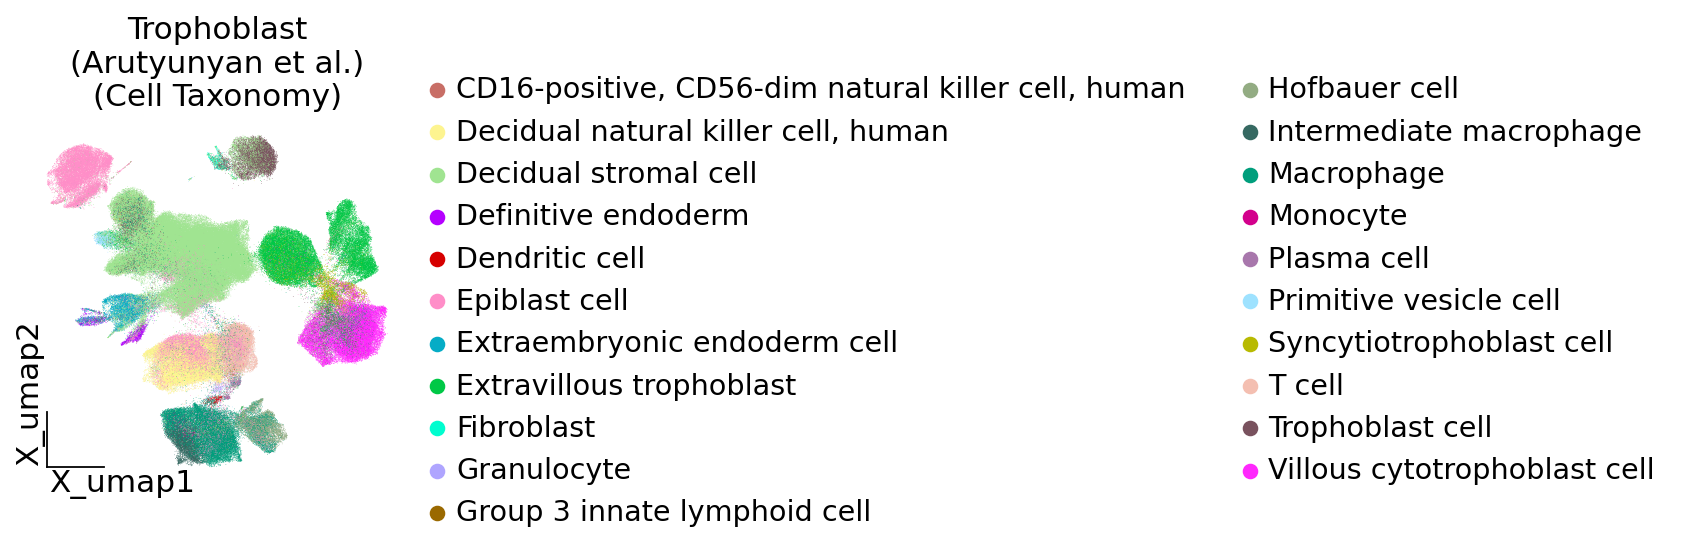

In [26]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='enhanced_cell_ontology_taxonomy_match',
    title='Trophoblast\n(Arutyunyan et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    #palette=rgba_list_to_hex(cmaps.greenorange_12.colors)+ov.pl.sc_color[11:],
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-Trophoblast-taxonomy-33.png',dpi=300,bbox_inches='tight')

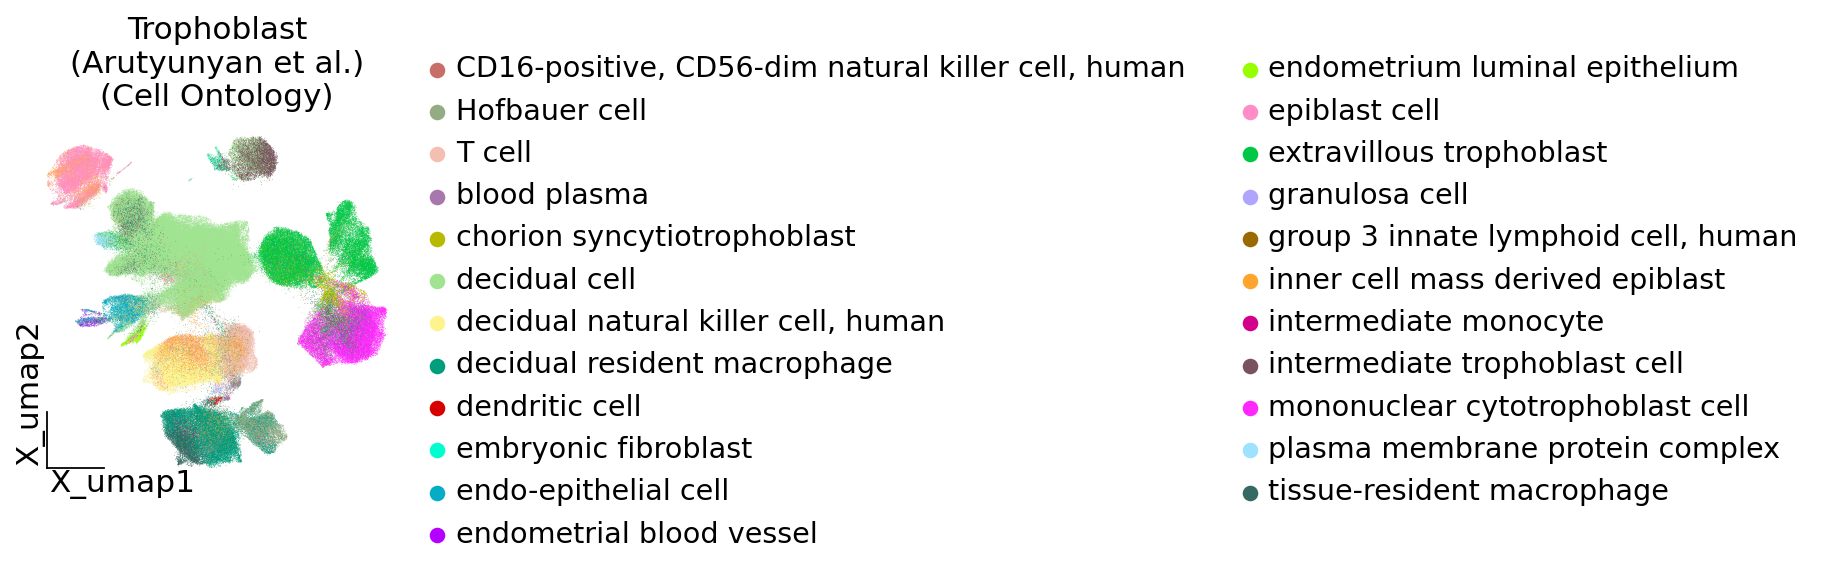

In [27]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology'

type_dict=dict(zip(
    adata.obs['celltype_predictions'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['celltype_predictions'].cat.categories,
    adata.uns['celltype_predictions_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Trophoblast\n(Arutyunyan et al.)\n(Cell Ontology)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-Trophoblast-ontology-33.png',dpi=300,bbox_inches='tight')

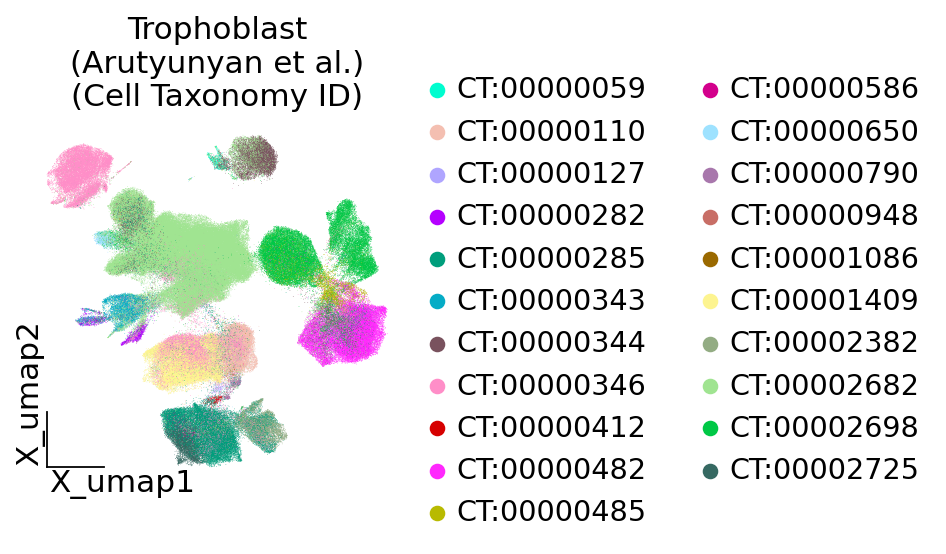

In [28]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_ct_id'

type_dict=dict(zip(
    adata.obs['celltype_predictions'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['celltype_predictions'].cat.categories,
    adata.uns['celltype_predictions_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Trophoblast\n(Arutyunyan et al.)\n(Cell Taxonomy ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-Trophoblast-taxonomy-id-33.png',dpi=300,bbox_inches='tight')

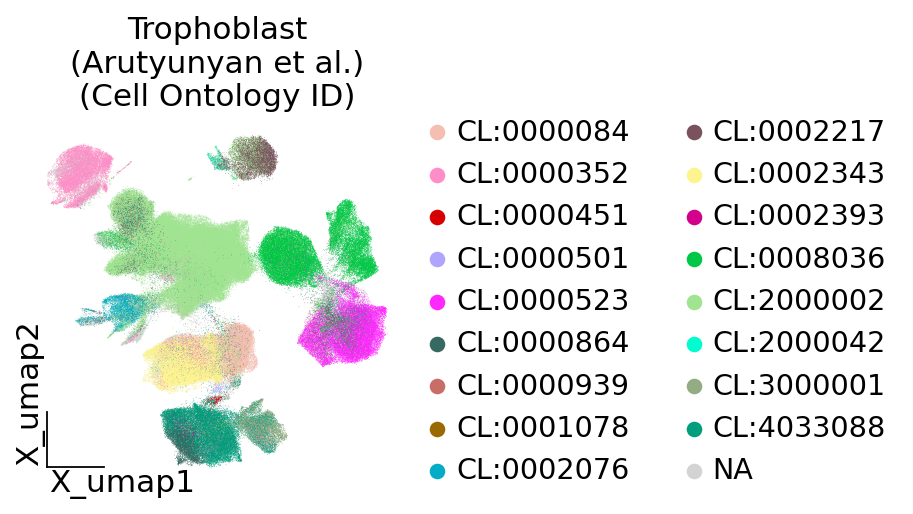

In [29]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_cl_id'

type_dict=dict(zip(
    adata.obs['celltype_predictions'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['celltype_predictions'].cat.categories,
    adata.uns['celltype_predictions_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Trophoblast\n(Arutyunyan et al.)\n(Cell Ontology ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-Trophoblast-ontology-id-33.png',dpi=300,bbox_inches='tight')

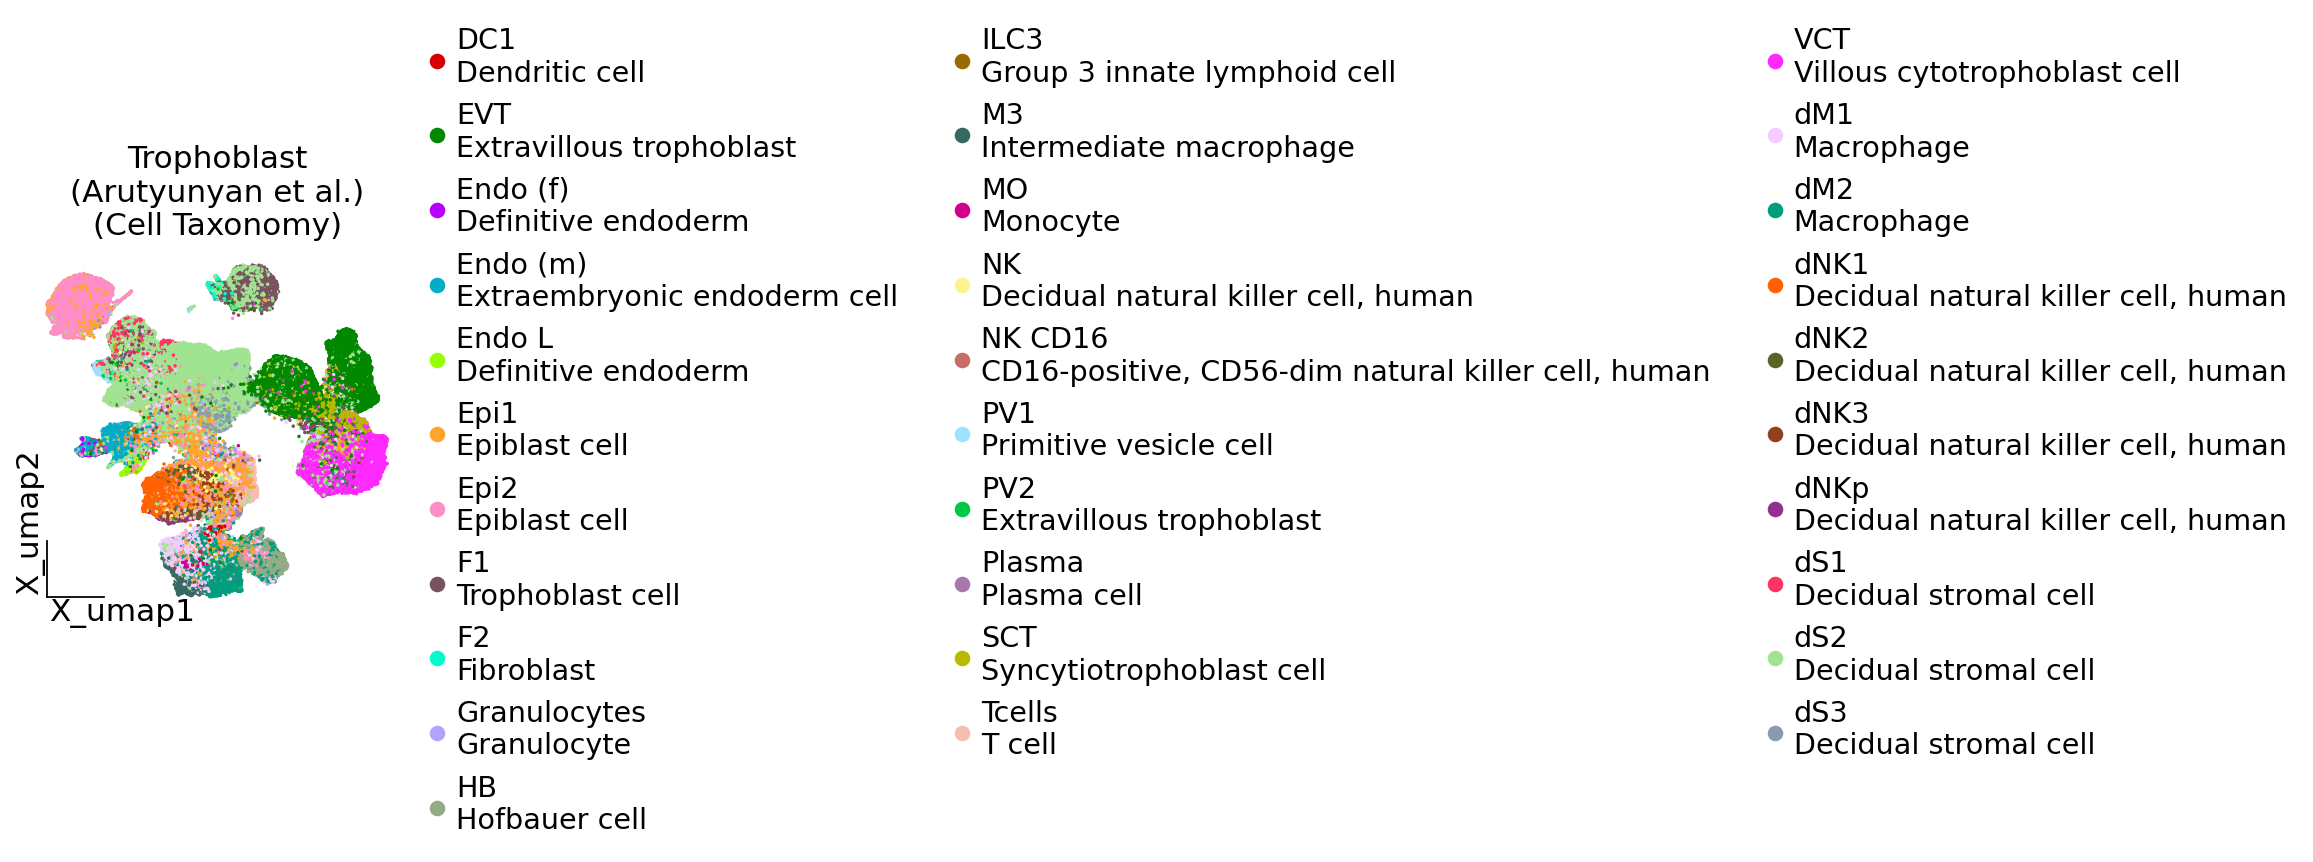

In [30]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j for i,j in zip(
    adata.obs['celltype_predictions'].tolist(),
    adata.obs[goal].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['celltype_predictions'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['celltype_predictions'].cat.categories,
    adata.uns['celltype_predictions_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Trophoblast\n(Arutyunyan et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-Trophoblast-Taxonomy-match-33.png',dpi=300,bbox_inches='tight')

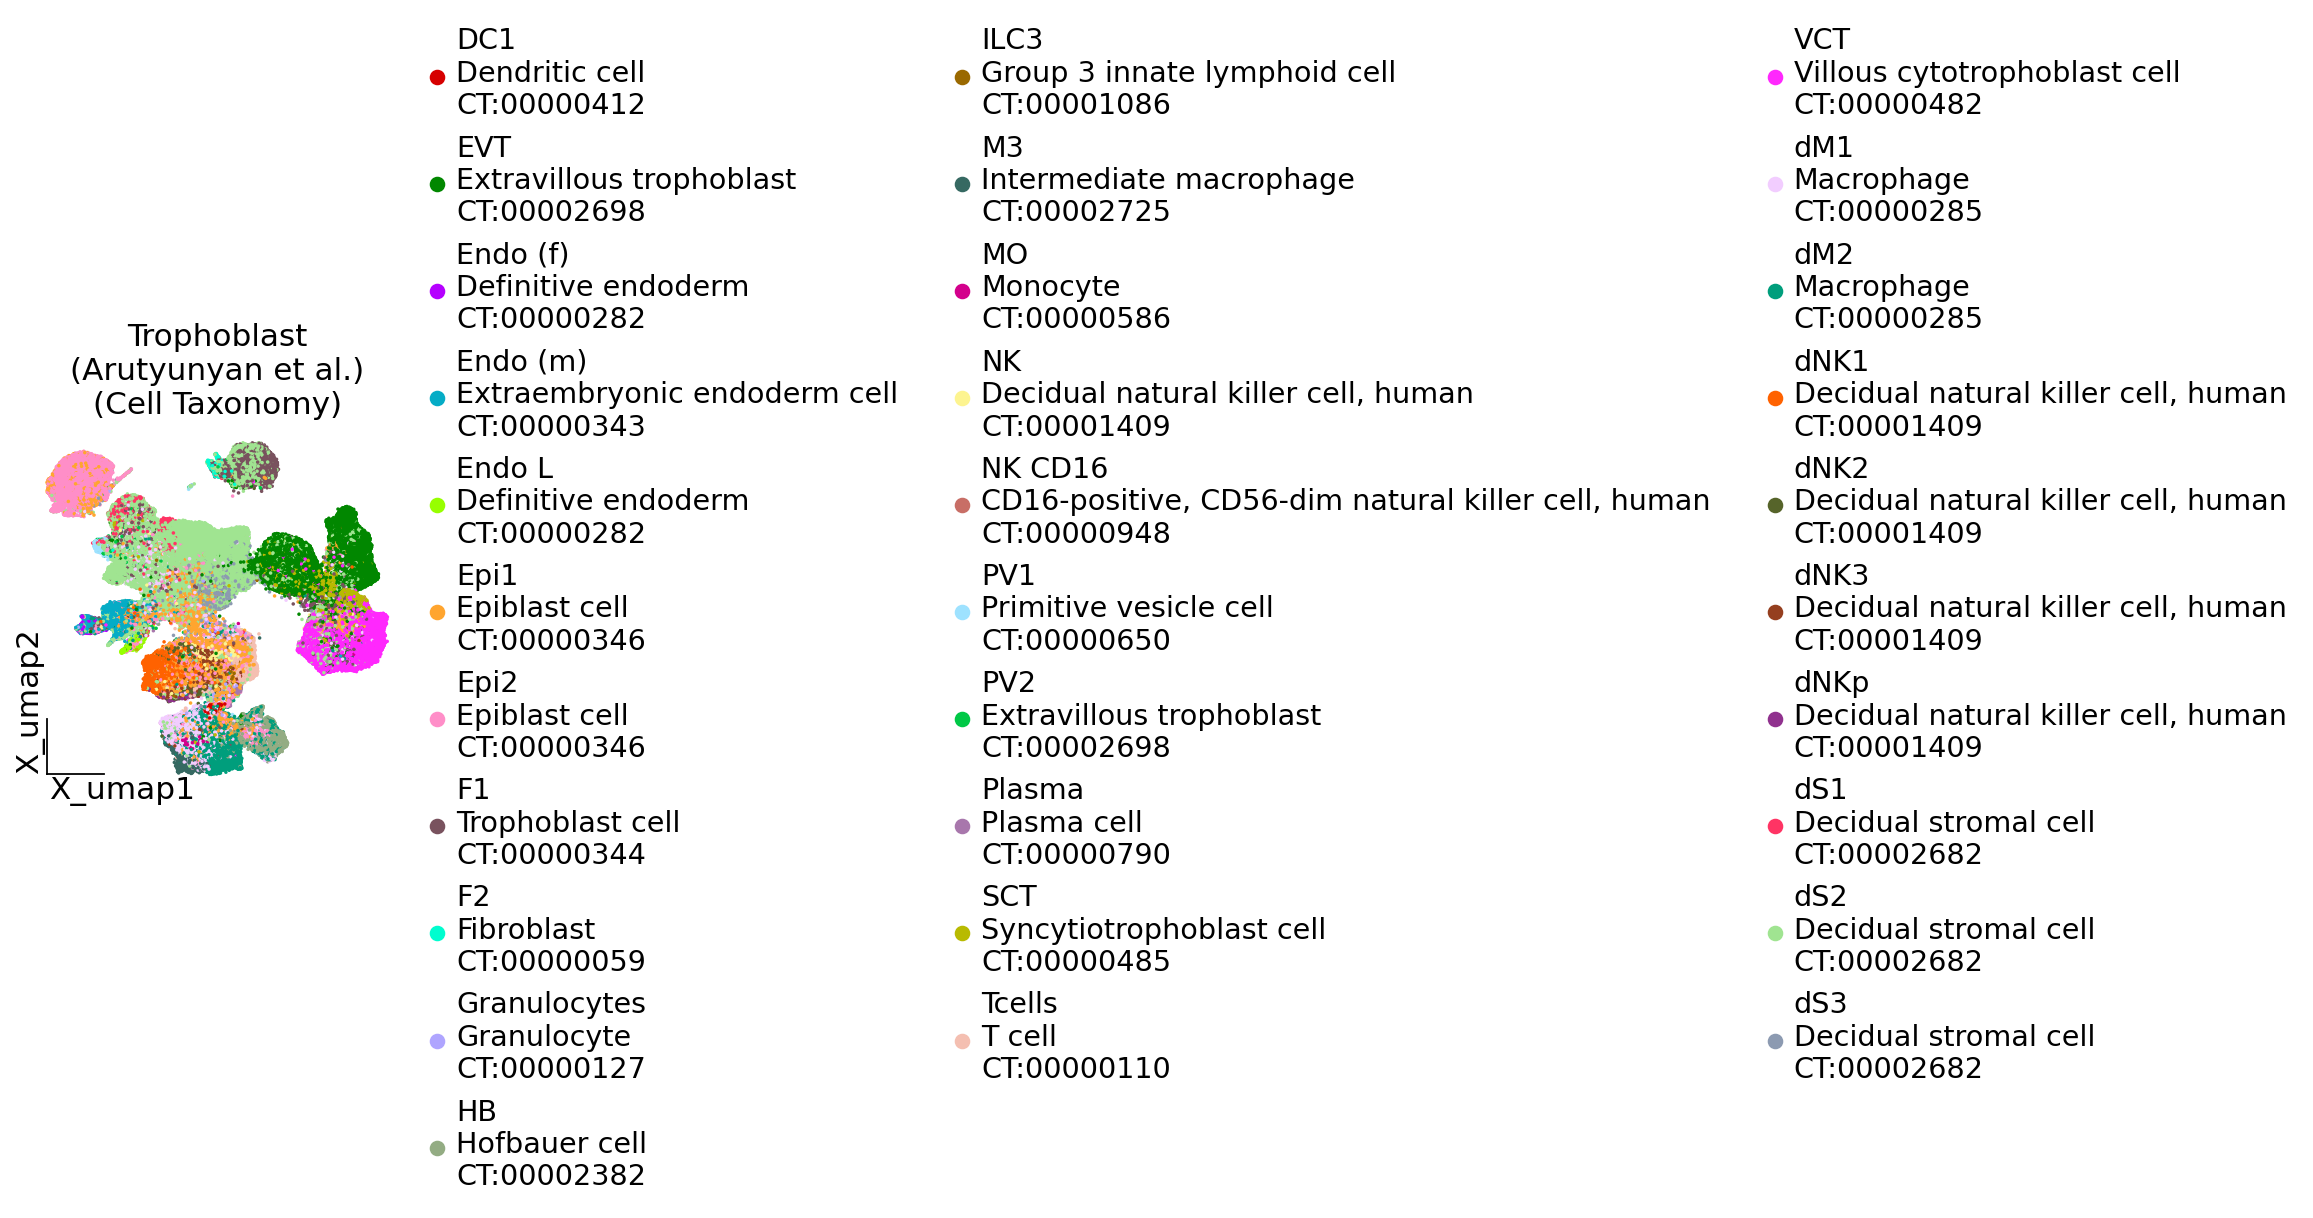

In [31]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j+'\n'+k for i,j,k in zip(
    adata.obs['celltype_predictions'].tolist(),
    adata.obs[goal].tolist(),
    adata.obs['enhanced_cell_ontology_ct_id'].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['celltype_predictions'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['celltype_predictions'].cat.categories,
    adata.uns['celltype_predictions_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Trophoblast\n(Arutyunyan et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-Trophoblast-Taxonomy-match-id-33.png',dpi=300,bbox_inches='tight')